imported classes

In [65]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [66]:
df = pd.read_csv('CommentToxcic/train.csv')


In [67]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
toxic,159571.0,0.095844,0.294379,0.0,0.0,0.0,0.0,1.0
severe_toxic,159571.0,0.009996,0.099477,0.0,0.0,0.0,0.0,1.0
obscene,159571.0,0.052948,0.223931,0.0,0.0,0.0,0.0,1.0
threat,159571.0,0.002996,0.054650,0.0,0.0,0.0,0.0,1.0
insult,159571.0,0.049364,0.216627,0.0,0.0,0.0,0.0,1.0
identity_hate,159571.0,0.008805,0.093420,0.0,0.0,0.0,0.0,1.0


In [70]:
df.iloc[7]['comment_text']

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [71]:
df[df.columns[2:]].iloc[5]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 5, dtype: int64

1. Preprocess

In [72]:
from tensorflow.keras.layers import TextVectorization

In [73]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [74]:
x = df["comment_text"]
y = df[df.columns[2:].values]

In [75]:
MAX_FEATURES = 200000

In [76]:
vectoriz = TextVectorization(
    max_tokens =MAX_FEATURES,
    output_sequence_length =1800,
    output_mode ="int"
)

In [77]:
type(x)

pandas.core.series.Series

In [78]:
type(x.values)

numpy.ndarray

In [79]:
vectoriz.adapt(x.values)

In [80]:
vectoriz.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [81]:
vectorized_text = vectoriz(x.values)

In [82]:
len(x)

159571

In [83]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file


In [84]:
dateset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dateset = dateset.cache()
dateset = dateset.shuffle(160000)
dateset = dateset.batch(32)
dateset = dateset.prefetch(8)

In [85]:
batch_x, batch_y = dateset.as_numpy_iterator().next()
batch_x.shape

(32, 1800)

100% ==> dataset
70% ==> training
30% ==> !20% ==> validation, 10% ==> testing

In [86]:
len(dateset)
train = len(dateset)*.7
train

3490.8999999999996

In [87]:
val = len(dateset)*.2
val

997.4000000000001

In [88]:
test = len(dateset)*.1
test

498.70000000000005

In [89]:
train = dateset.take(int(len(dateset)*.7))
val = dateset.skip(int(len(dateset)*.7)).take(int(len(dateset)*.2))
test = dateset.skip(int(len(dateset)*.9)).take(int(len(dateset)*.1))

2. Create Sequential Model


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [103]:
model = Sequential()
# craete the embedding later
model.add(Embedding(MAX_FEATURES+1, 32))
model.add(Bidirectional(LSTM(32, activation="tanh")))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(6, activation="sigmoid"))


In [104]:
model.compile(loss="BinaryCrossentropy", optimizer="Adam")

In [105]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 32)          6400032   
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 6)                 774       
                                                      

In [106]:
history = model.fit(train, epochs=1, validation_data=val)

Epoch 1/100
  19/3490 [..............................] - ETA: 34:40 - loss: 0.5237

KeyboardInterrupt: 

In [ ]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

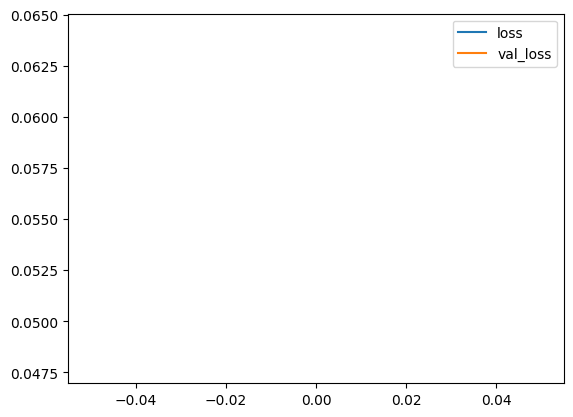

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

3. Make Predictions


In [ ]:
input_text = vectoriz('You freaking suck! I am going to hit you.')


In [ ]:
# res = model.predict(input_text)
res = model.predict(np.expand_dims(input_text,0))


1/1 [==============================] - 1s 526ms/step


In [ ]:
(res > 0.5).astype(int)


array([[1, 0, 1, 0, 1, 0]])

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()


In [ ]:
(model.predict(batch_X) > 0.5).astype(int)


1/1 [==============================] - 0s 124ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
res.shape


(1, 6)

4. Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)


1/1 [==============================] - 0s 100ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


Precision: 0.8713071346282959, Recall:0.620639979839325, Accuracy:0.35542169213294983


5. Test and Gradio


In [ ]:
import gradio as gr

In [ ]:
model.save('toxicity.h5')


c:\Users\Soft\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('toxicity.h5')


In [ ]:
input_str = vectoriz('hey i freaken hate you!')


In [ ]:
res = model.predict(np.expand_dims(input_str,0))


1/1 [==============================] - 1s 528ms/step


In [ ]:
res


array([[0.6589588 , 0.01906785, 0.2688116 , 0.03458568, 0.29122305,
        0.07231057]], dtype=float32)

In [ ]:
def score_comment(comment):
    vectorized_comment = vectoriz([comment])
    results = model.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx] > 0.5)

    return text


In [ ]:
interface = gr.Interface(fn=score_comment, inputs=gr.inputs.Textbox(
    lines=2, placeholder='Comment to score'), outputs='text')


NameError: name 'gr' is not defined

In [ ]:
interface.launch(share=True)